# 19-1. 들어가며

요즘 핫한 '딥러닝'은 이름에서도 볼 수 있듯, 깊게 구성된 신경망입니다.
이렇게 신경망을 깊게 쌓는 데에도 많은 연구와 기법이 필요한데요.

연구자들이 더 좋은 성능을 내는 딥네트워크를 만들기 위해서 다양한 방법을 적용하면서, 많은 종류의 네트워크들이 탄생했습니다. 그중 몇 가지 사전학습된 네트워크(Pre-trained network)들은 Tensorflow나 PyTorch 등 프레임워크 차원에서 지원하고 있어요. 아래 사진에 보이는 모델만 20가지가 넘습니다. 많아서 복잡해 보일 수 있지만, 그만큼 활발한 분야고 가져다 쓸 수 있는 네트워크들이 많다는 점을 확인할 수 있습니다.

이런 네트워크들은 딥러닝을 하다 보면 자주 접하게 됩니다. 이번 시간에는 딥러닝 네트워크들이 어떻게 생겨났고 어떤 시도로 만들어진 것인지 알아보겠습니다.

실습목표
---

- 딥러닝 네트워크들을 동물원 구경하듯 둘러봅니다. (Model Zoo라고도 하죠)
- 딥러닝이 어떻게 시작된 것인지 알아봅니다.
- ResNet과 VGG는 무엇을 시도했는지 알아봅니다.

Q1. 이전에 써봤던 Pre-trained network가 있다면 무엇이 있었는지 적어봅시다!  

A1. VGG16을 이용해서 강아지/고양이 이미지 분류문제를 풀어보았습니다.

이전에 써봤던 Pre-trained network가 없다면, TensorFlow-Slim image classification model library (https://github.com/tensorflow/models/tree/master/research/slim)에서 Pre-trained Model을 한번 둘러봅시다.

# 19-2. ImageNet Challenge

**이미지넷(ImageNet)** 은 비전(vision) 관련 딥러닝을 하다 보면 필연적으로 마주치게 되는 이름입니다. 이미지넷은 2010년 ILSVRC2010를 시작으로 대량의 이미지 데이터를 포함하는 데이터셋입니다. ILSVRC2010의 소개에 따르면, 이미지넷은 1만 개가 넘는 카테고리에 대해 100만 장 규모의 이미지를 가지고 있다고 합니다.

이미지 데이터를 수집할 당시 10억 장의 이미지에서 167개국에서 모인 5만 명의 작업자가 라벨링에 참여했다고 하네요. 재밌는 건 고양이 사진이 무려 6만 2천 장 가량 나왔다고 합니다.

이 데이터셋은 모으는 데서 멈추지 않고 챌린지를 위한 데이터셋으로 제공됐습니다. 그중 가장 유명한 테스크가 바로 우리가 많이 봐왔던 이미지 분류기(Image Classification Task)입니다.

2010년 이 테스크에는 11개의 팀이 참가했습니다. 그중 NEC-UIUC팀이 **Descriptor Coding**과 **SVM**을 결합한 방식을 사용해 오류율 28%로 1등을 달성합니다. 이듬해인 2011년에는 Xerox Research Centre Europe이 오류율 26%로 1등을 달성하게 됩니다.

그리고 바로 그다음 해에는 Geoffrey Hinton 교수님이 이끄는 토론토 대학의 SuperVision팀이 오류율 16%로 1등을 달성합니다. 이전 1등들이 민망할 만큼 놀라운 차이를 보여주는데요. 과연 이 팀은 어떤 방법을 썼을까요?

Q2. 위에서 본 ImageNet Pretrained Model의 Accuracy는 두 가지입니다. 그렇다면 Top-1 Accuracy와 Top-5 Accuracy는 어떻게 다른 걸까요?

Top-1 accuracy는 예측값이 일반적으로 생각하는 정답을 맞추는 정확도입니다.
Top-5 accruacy는 예측한 확률이 높은 순서로 5개 내에서 정답이 있을 경우 맞춘 것으로 간주한 정확도입니다.

ImageNet이 만들어진 이야기는 페이페이 교수님의 TED에서 들어볼 수 있습니다. 길지만 한국어 자막도 있으니 봐두면 좋을 것 같습니다.

https://www.ted.com/talks/fei_fei_li_how_we_re_teaching_computers_to_understand_pictures?language=ko

# 19-3. 딥네트워크의 시작

SuperVision 팀이 전년도 대비 10%의 오류율을 낮추면서 1등을 할 수 있었던 비법은 네트워크를 깊게 쌓았기 때문입니다. AlexNet이라는 이름은 논문의 1저자인 Alex Khrizevsky의 이름에서 따왔다고 하네요.

위의 그림에서 잘린 부분은 GPU의 병렬 연산을 표현하기 위한 것으로 보시면 됩니다. 레이어가 많이 생긴 정도이지 MNIST에 CNN과 클래스가 많이 있는 네트워크로 볼 수 있습니다. 여기에 더해진 것들은 ReLU 활성화 함수와 드롭아웃(Dropout) 그리고 오버래핑 풀링(Overlapping pooling) 등이 적용되었다고 합니다. 방금 설명해 드린 기법에 대한 내용은 아래 사이트와 논문에서 더 자세히 확인하실 수 있습니다.

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf

https://bskyvision.com/421

Q3. AlexNet에서 가장 깊은 레이어는 몇 개의 CNN을 사용했을까요?  

A3. AlextNet에서 가장 깊게 실험된 조건은 7개의 CNN과 2개의 FCN을 사용했습니다. 논문의 Table 2.에서 해당 조건을 확인할 수 있는데 7개의 CNN 모델에는 Pre-training을 적용했습니다.

# 19-4. CNN을 잘쓰자

다음으로 소개해드릴 네트워크 모델은 VGG입니다. VGG는 AlexNet 같이 이미지넷 챌린지에서 공개된 모델이에요. 이 모델은 2014년 이미지넷 챌린지 준우승을 거두었습니다.

우승 모델이 아닌 준우승 모델을 소개 드리는 이유는 간결한 구조로 많은 활용이 이루어졌기 때문인데요. 이전에 우승한 네트워크들이 10개가 안 되는 CNN층을 가진 반면, VGG16과 VGG19라는 이름 뒤의 숫자로 볼 수 있듯이, VGG는 16개, 19개의 층으로 이뤄집니다.

그럼 VGG에서는 어떤 방식으로 이런 레이어를 쌓았을까요? CNN을 만들 때 우리는 커널 크기(kernel size)를 조절합니다. VGG에서는 3x3 커널을 사용해서 더 많은 레이어를 쌓고 이미지의 비선형적 특성을 더 잘 잡아낼 수 있게 만들었어요.

레이어가 많아지면 걱정되는 것이 연산이 많아지는 점인데요. 5x5와 7x7 레이어를 3x3 레이어와 비교해 봅시다. 입/출력 채널의 수를 각각 C라고 했을 때 커널 크기가 7x7인 CNN 레이어를 한 개 쌓으면 (7x7)×C 2 번 연산을 해야 합니다. 그리고 커널 크기가 5x5인 CNN은 (5x5)×C 2의 연산을 필요로 합니다. 그렇다면 3x3은 어떻게 될까요? 레이어가 N개 일 때, Nx(3x3)xC 2개의 연산으로 레이어가 3개더라도 5x5인 레이어 1개와 비슷한 연산 수를 유지하게 됩니다.

아래 링크를 통해 자세한 설명과 논문을 확인하실 수 있습니다.

https://arxiv.org/pdf/1409.1556.pdf

https://bskyvision.com/504

https://m.blog.naver.com/laonple/220686328027

https://ratsgo.github.io/deep%20learning/2017/10/09/CNNs/

Q4. ILSVRC2014에서 1등을한 GoogleNet과 VGG는 어떻게 다른지 GoogleNet의 구조를 찾아보고 비교해봅시다!

A4. 우선, 레이어의 갯수에서 차이가 납니다. GoogleNet은 22개의 Layer 그리고 VGG16은 16개의 레이어를 갖습니다. VGG는 간결하게 레이어를 쌓아나간 반면 GoogleNet에서는 Inception block을 도입해서 다양한 기법을 사용해 볼 수 있도록 사고를 확장합니다.

# 19-5. 멀리 있으면 잘 안 들려요

경사 소실 문제 해결 (http://cbjsena.blogspot.com/2018/12/blog-post_25.html)

앞의 내용을 보면 네트워크를 깊게 쌓기가 생각보다 어려운 문제라는 것을 엿볼 수 있는데요. 그렇다면 그 원인이 무엇일까요?

멀리서 말하는 사람의 목소리가 잘 안 들리듯, 모델이 깊어질수록 모델의 학습을 위한 Gradient가 사라지는 현상이 발생합니다. 조금 더 자세히 설명하자면, 우리의 네트워크는 Gradient descent를 통해서 기울기를 학습하는데 깊은 레이어에는 데이터에 따른 차이가 충분하게 반영되지 못합니다. 이렇게 Gradient가 매우 작아져서 레이어를 학습시키기 위해 충분한 값을 표현하지 못할 경우를 Vanshing 했다고 하여 기울기 소실(경사소실, Vanishing Gradient) 이라고 합니다.

Vanishing 또는 Exploding Gradient의 문제가 발생하는 원인은, 레이어가 깊어지면서 Gradient가 매우 커지거나 작아지기 때문입니다. 레이어의 가중치가 반복돼서 곱해지면, 1보다 작을 때에는 0에 너무 가까워져 버리고, 1보다 클 때에는 그 값이 기하급수적으로 커지게 됩니다. 이 내용은 Andrew Ng 교수님의 Vanishing/Exploding Gradients 영상을 보도록 합시다.

https://youtu.be/qhXZsFVxGKo

이렇게 Gradient가 사라져서 깊은 레이어가 적절히 학습되지 않는 문제를 해결하기 위해서 ResNet은 새로운 방법을 도입했습니다. 다음 스텝에서 그 방법을 자세하게 알아보도록 하죠.

Q5. Vanishing Gradient 문제를 해결하는 방법에는 어떤 것이 있나요?

A5. 활성화 함수를 변경하거나 가중치 초기화 방법을 통해서 Vanishing Gradient 문제를 완화할 수 있습니다.

# 19-6. 지름길을 만들어주자

레이어를 깊게 쌓으면서 생기는 Vanishing/Exploding Gradient 문제를 해결하기 위해서 ResNet은 생각보다 간단한 방법을 사용했습니다.

위의 그래프는 이미지넷 챌린지의 역대 모델들의 레이어 수와 오류율(error rate)의 그래프입니다. ResNet의 레이어 수는 무려 152개를 넘어갑니다.

그럼 ResNet은 어떤 방식을 도입해서 이렇게 깊은 레이어를 쌓을 수 있을까요?

아래는 VGG19 와 ResNet34 의 네트워크 구조를 비교한 그림입니다. 왼쪽의 VGG와 중간, 우측의 ResNet을 비교해 보면 ResNet은 VGG보다 확연히 레이어 수가 많습니다.

가운데 Plain ResNet과 우측의 Residual ResNet을 비교해 볼까요?. ResNet에서는 Residual Model에서 보이는 것처럼 Skip Connection이라는 구조를 사용해서 Vanishing Gradient 문제를 해결했습니다.

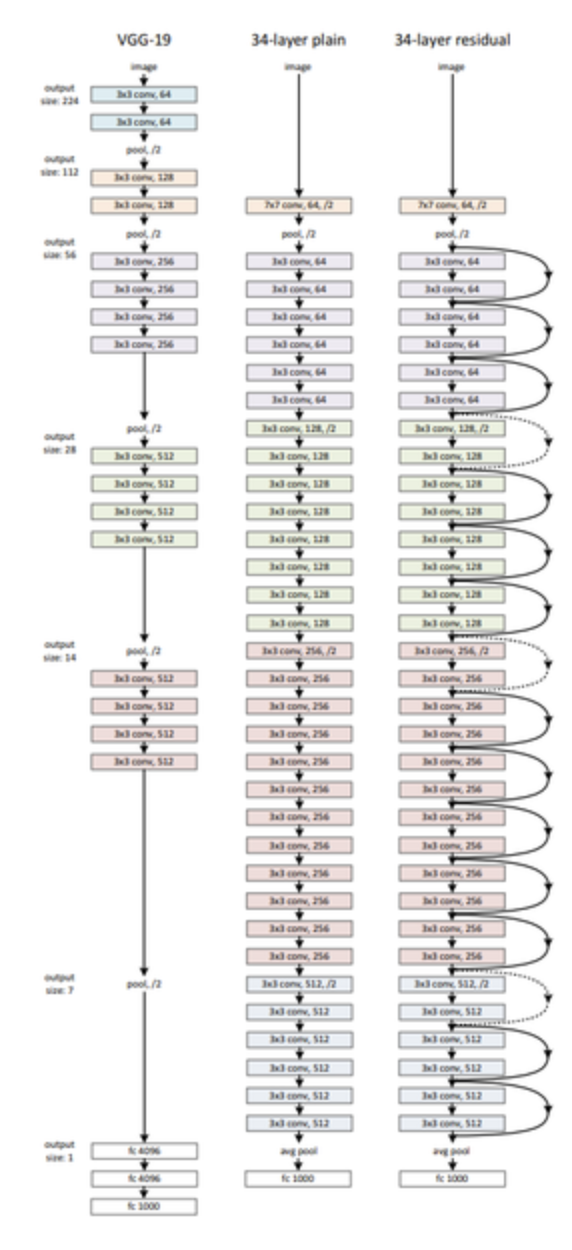

Skip Connection은 아래처럼 레이어의 입력을 다른 곳에 이어서 Gradient가 깊은 곳까지 이어지도록 합니다.

아래 그림처럼 레이어와 Skip Connection이 있는 블록을 Residual Block이라고 합니다.

이번에도 Andrew Ng 교수님의 ResNet에 대한 설명을 보고 더 깊게 배워봅시다.

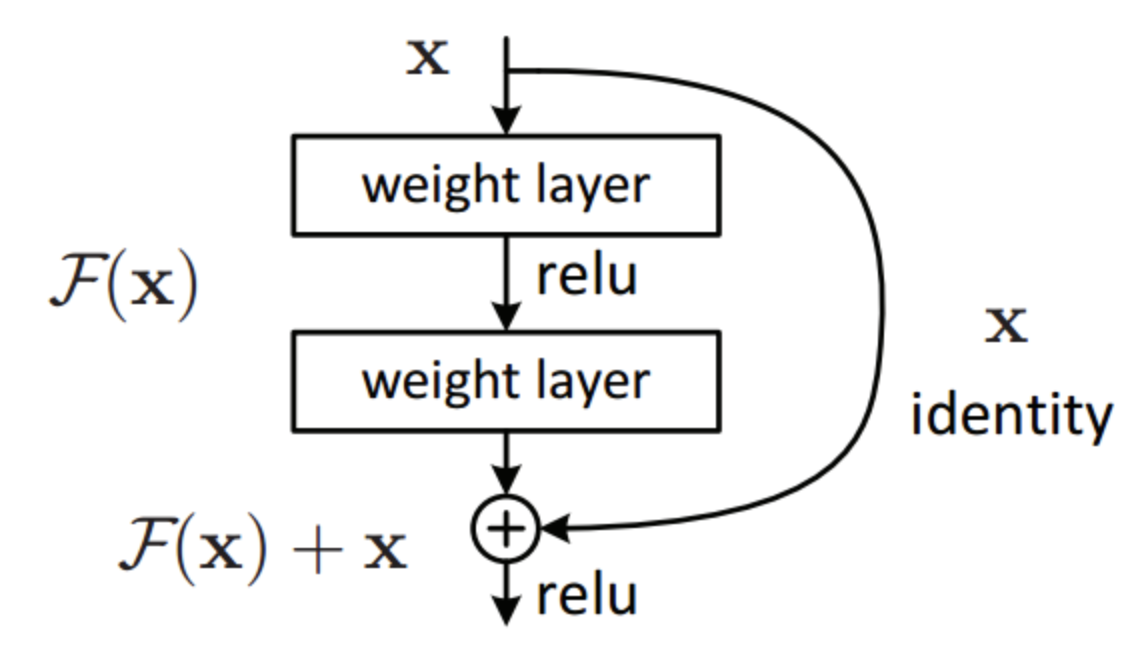

Q6. Skip connection을 가진 네트워크를 찾아봅시다!

A6. 다양한 모델들이 있습니다. segmentation에서 활용되는 U-Net의 구조도 일종의 Skip connection으로 볼 수 있습니다.

이론은 대략적으로 본 것 같습니다. 이제 네트워크가 어떻게 만들어지는지 직접 보러 갑시다!

# 19-7. 딥네트워크 속속들이

지금까지 잘 알려진 딥네트워크들이 어떤 이유에서 어떤 구조를 갖게 되었는지 확인해 보았습니다.

이제 직접 모델을 만들어보는 대신, 우리가 봐왔던 모델이 Tensorflow의 model API와 Keras에서 어떻게 구현되어 있는지 모델 구조와 비교하며 코드를 확인해보도록 하겠습니다.

실습목표
---

- 그림과 글로만 보던 딥네트워크 어떻게 만들고 있는지 알아봅니다.
- 논문의 방법이 사용된 부분을 코드에서 찾을 수 있습니다.
- 나도 할 수 있다는 자신감을 챙깁니다.

# 19-8. Model API

초기에 Tensorflow와 Keras는 포함 관계가 없었습니다. Tensorflow를 편하게 사용할 수 있도록 만든 것이 Keras였지만 Tensorflow 말고도 다른 인공지능 라이브러리를 편하게 사용할 수 있도록 만들어 졌거든요. 이후 Keras 창시자인 프랑소아 숄레가 구글에 합류하고, Tensorflow 1.2부터 tf.keras를 등장 시키기 시작하여 Tensorflow 2.0에 이르러서는 본격적으로 Keras를 직접 지원하면서 Tensorflow가 Keras를 포함한 형태를 보이게 되었습니다.

그래서 Tensorflow와 Keras가 서로 다른 방식으로 사전학습 모델을 제공합니다.

***Tensorflow***

Tensorflow의 사전학습 모델(pre-trained model)들은 slim이라는 고수준 API로 구현되어있습니다.

Tensorflow models repository (https://github.com/tensorflow/models) 에서 구현된 모델들을 확인하실 수 있습니다.

핵심 부분인 tf_slim을 뜯어보기는 조금 어렵고 사용하는 일도 많지 않으니 자세히 보지 않으셔도 좋습니다.

***Keras***

Keras는 Keras applications를 통해 사전학습 모델을 제공합니다.

Keras applications docs (https://www.tensorflow.org/api_docs/python/tf/keras/applications) 에서 어떤 모델을 지원하는지 확인이 가능합니다. 그리고 Keras applications (https://github.com/keras-team/keras-applications) 에서 구현된 코드를 확인하실 수 있습니다.

공부를 위해서 직접 구현하시거나 특정 부분의 수정을 원할 때, 또는 공식 문서로 봐도 충분히 이해가 되지 않을 때는 코드를 직접 읽는 것이 가장 이해가 빠를 수 있습니다. Tensorflow가 편한 분들은 Tensorflow 구현으로 진행하셔도 무방합니다. 다만 Keras의 모델 구현이 간결해 초심자에게 유용하니 Keras로 프로젝트를 진행하는 것을 추천드립니다.

Q7. VGG-16와 ResNet-50은 Keras 내 어디에 구현되어 있을까요? (URL을 적어주세요.)

A7. VGG-16 링크
(https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg16/VGG16)

ResNet-50 링크
(https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50)

# 19-9. VGG-16

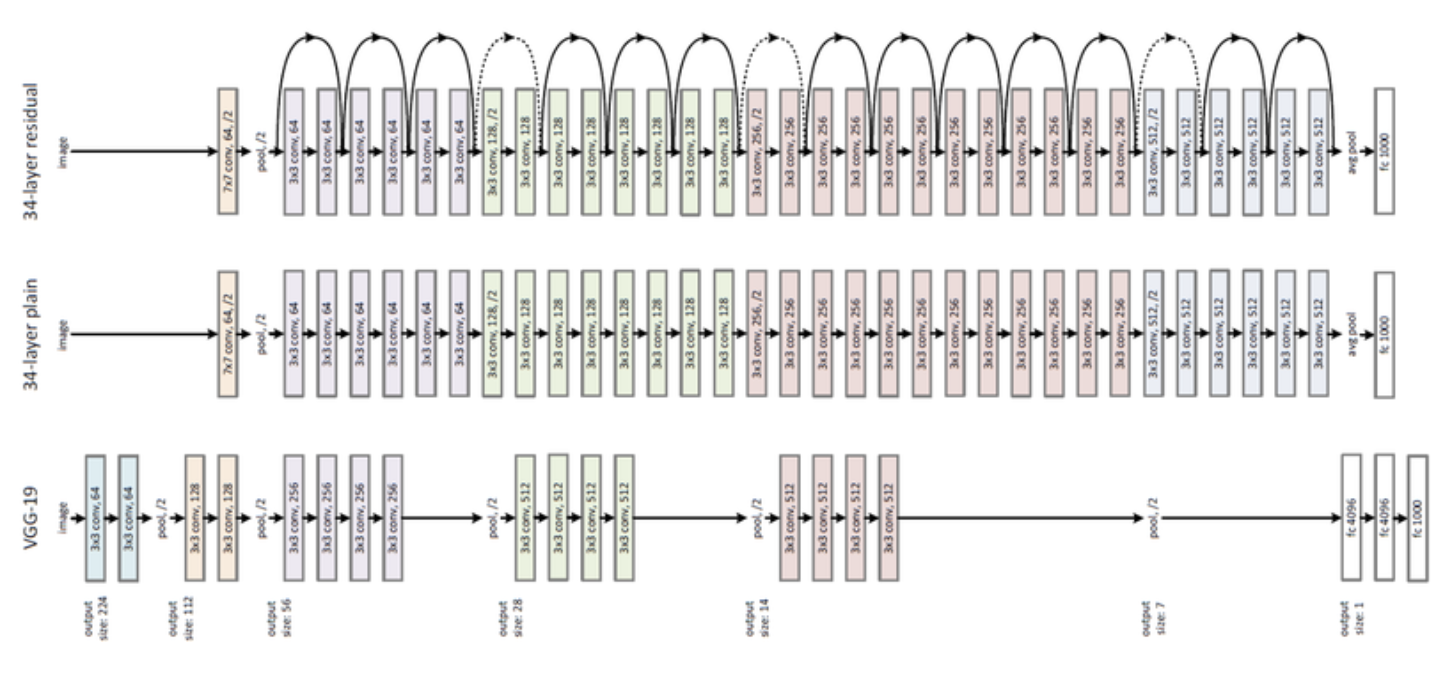

네 번째 스텝(CNN을 잘 쓰자)에서 봤던 VGG16입니다. Max pooling과 softmax 등의 활성화 함수(Activation function)를 제외하면 CNN 계층과 완전 연결 계층(Fully Connected Layer)을 합쳐 16개의 레이어로 구성되어 있습니다.

그냥 VGG16 코드를 찾아서 읽어보기만 하면 재미가 없죠? 아마 MNIST나 CIFAR100 이미지셋 분류기 등을 이미 만들어 보셨을 텐데요, 이번에는 그동안 우리가 만들어 본 분류기의 모델을 VGG로 바꿔보는 과정을 진행해보면 어떨까요? 예를 들면 아래와 같은 분류기 말입니다.

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.applications import imagenet_utils

# CIFAR100 데이터셋을 가져옵시다. 
cifar100 = keras.datasets.cifar100

(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print("x_train:", len(x_train), "x_test:", len(x_test))

x_train: 50000 x_test: 10000


In [24]:
img_input = keras.Input(shape=(32, 32, 3))

x = keras.layers.Conv2D(16, 3, activation='relu')(img_input)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Conv2D(32, 3, activation='relu')(x)
x = keras.layers.MaxPool2D((2,2))(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
predictions = keras.layers.Dense(100, activation='softmax')(x)

model = keras.Model(inputs=img_input, outputs=predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2951

우리가 그동안 학습했던 Convolution Neural Network는 대략 위와 같은 model 구조를 가지고 있을 것입니다.

학습해야 할 파라미터가 대략 326K 정도 되는군요.

1 Epoch만 훈련시켜 봅시다. 우리는 성능 최적화를 시도하는 게 아니라 모델 구조를 분석하고 있는 거니까요.

In [25]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 6s 3ms/step - loss: 4.0139 - accuracy: 0.0944


좋습니다. 그럼 이제 위 코드에서 model 부분을 VGG16으로 바꿔보겠습니다.

앞장에서 알려드린 Keras VGG16 코드 구현 소스코드로부터 다음 구현 부분을 찾아서 적용해 봅시다. 지금 필요한 것은 Ctrl+C와 Ctrl+V 입니다.

지금부터 해볼 문제는 코드에서 Block마다 구현이 어떻게 되어 있는지 찾는 것입니다. 구분해서 찾아야 할 블록은 다음과 같습니다.

1. 첫 번째 블록(첫 번째 Max pooling까지)
2. 두 번째 블록(두 번째 Max pooling까지)
3. 세 번째 블록(세 번째 Max pooling까지)
4. 네 번째 블록(네 번째 Max pooling까지)
5. 다섯 번째 블록(다섯 번째 Max pooling까지)
6. 여섯 번째 블록(완전 연결 계층 + softmax까지)

아래 예시는 Keras의 VGG16 구현에서 첫 번째 블록의 예시답안은 다음과 같습니다.

Keras의 Functional API 구조가 익숙하시다면 어려움 없이 답을 찾으실 수 있을 것입니다.

In [26]:
# 첫 번째 블록(예시)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv1')(img_input)
x = layers.Conv2D(64, (3, 3),
                  activation='relu',
                  padding='same',
                  name='block1_conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

print('첫 번째 블록 OK!!')

첫 번째 블록 OK!!


나머지 블록도 쉽게 찾으실 수 있을 겁니다. 블록과 레이어마다 커널이 어떻게 달라지는지,  
또 구현할 때 레이어에 argument로 어떤 것들이 추가되는지 생각해 보면 공부에 도움이 됩니다.

Keras의 VGG16 소스코드를 확인해 아래에 두 번째부터 여섯 번째 블록을 정리해 보세요.

In [27]:
# 두 번째 블록
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv1')(x)
x = layers.Conv2D(
  128, (3, 3), activation='relu', padding='same', name='block2conv2')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

print('두 번째 블록 OK!!')

두 번째 블록 OK!!


In [28]:
# 세 번째 블록
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv1')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv2')(x)
x = layers.Conv2D(
  256, (3, 3), activation='relu', padding='same', name='block3conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3pool')(x)

print('세 번째 블록 OK!!')

세 번째 블록 OK!!


In [29]:
# 네 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block4conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4pool')(x)

print('네 번째 블록 OK!!')

네 번째 블록 OK!!


In [30]:
# 다섯 번째 블록
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv1')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv2')(x)
x = layers.Conv2D(
  512, (3, 3), activation='relu', padding='same', name='block5conv3')(x)
x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5pool')(x)

print('다섯 번째 블록 OK!!')

다섯 번째 블록 OK!!


In [31]:
# 여섯 번째 블록
# [Keras VGG16 코드 구현] 링크의 if include_top: 부분을 유심히 보세요 

x = layers.Flatten(name='flatten')(x)
x = layers.Dense(4096, activation='relu', name='fc1')(x)
x = layers.Dense(4096, activation='relu', name='fc2')(x)

classes=100
x = layers.Dense(classes, activation='softmax', name='predictions')(x)    # CIFAR100을 위한 모델 Output

print('여섯 번째 블록 OK!!')

여섯 번째 블록 OK!!


휴, 수고 많으셨습니다. 하지만 구슬도 꿰어야 보배가 되는 법입니다. 위에 쌓은 VGG 레이어를 실제로 model로 만들어 보아야겠습니다

In [32]:
model = keras.Model(name="VGG-16", inputs=img_input, outputs=x)

model.summary()

Model: "VGG-16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2conv1 (Conv2D)         (None, 16, 16, 128)       73856     
_________________________________________________________________
block2conv2 (Conv2D)         (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0    

VGG16 모델을 잘 가져오셨나요? VGG16 모델이 제대로 만들어졌다면 학습 파라미터 크기는 무려, 무려... 34M이나 됩니다. 위에서 우리가 만들어 보았던 Convolutional Neural Network의 무려 100배가 넘어가는 크기입니다.

이렇게 크고 복잡한 모델이라 할지라도 소스코드 구조를 분석하는 것은 의외로 어렵지 않습니다. Github에 있는 무궁무진한 소스코드들이 모두 여러분들의 훌륭한 학습자료가 되어줄 것입니다.

그럼 제대로 가져왔는지 실제로 학습을 수행해 봐야겠군요.

In [33]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 151s 80ms/step - loss: 4.6063 - accuracy: 0.0087


어떠신가요? 학습이 잘 되는 것 같으신가요? 아마 지금쯤 고개를 갸우뚱하고 계실지도 모르겠군요.

파라미터가 34M나 되는 VGG16은 이미지넷 데이터를 토대로 수 시간 동안 학습을 진행해야 안정적으로 수렴합니다. CIFAR100은 1 Epoch 정도로는 어림없겠죠?
하지만 복잡해 보이는 모델도 충분히 가져와서 우리의 테스크에 활용할 수 있을 것 같습니다.

# 19-10. ResNet-50

이번에는 Skip connection이 추가되어 있는 ResNet입니다.

Skip connection이 포함된 Residual Block은 어떻게 구현되어 있을까요? 그리고 레이어 수가 많아졌는데 이전 VGG와 어떤 점이 다르게 구현이 되어 있을지 궁금합니다.

위에서 ResNet의 구조를 보면 색깔이 서로 다른 블록들이 있습니다. 이는 블록마다 feature의 크기가 서로 다르기 때문인데요. 이렇게 크게 4개의 Stage로 구분해서 생각할 수 있습니다. 하나의 Stage 안에서는 kernel 사이즈와 channel 수가 동일하니, 이런 블록은 일일이 하나씩 짜지 않고 블록 단위로 생성합니다.

그렇다면 구현한 방법을 직접 찾아서 정리해보도록 할까요? 이번에도 Keras ResNet50 코드 구현 (https://git.dst.etit.tu-chemnitz.de/external/tf-models/-/blob/1d057dfc32f515a63ab1e23fd72052ab2a954952/official/vision/image_classification/resnet_model.py) 소스코드로부터 모델 구현 부분을 가져와 봅시다. 이번 코드는 resnet50() 함수를 이용하면 모델까지 깔끔하게 생성해 주기 때문에 훨씬 가져오기 쉽도록 잘 정리되어 있습니다.

코드를 분석해 보면 ResNet50 모델을 생성하기 위해서 반복적으로 활용하는 conv_block과 identity_block이 있을 것입니다. 이런 블록 구조를 잘 활용하여, 50개나 되는 복잡한 레이어 구조를 간결하게 표현하고 있는 것을 확인하실 수 있습니다. 그럼 코드를 가져와 볼까요? 데이터셋은 이전 스텝에서 활용했던 CIFAR100을 그대로 활용해 보겠습니다.

In [12]:
# 추가로 import해야 할 패키지들을 먼저 가져옵니다. 
from tensorflow.python.keras import backend
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import initializers
from tensorflow.python.keras import models

# block 안에 반복적으로 활용되는 L2 regularizer를 선언해 줍니다.
def _gen_l2_regularizer(use_l2_regularizer=True, l2_weight_decay=1e-4):
  return regularizers.l2(l2_weight_decay) if use_l2_regularizer else None

print('Resnet50 GoGo!!')

Resnet50 GoGo!!


이어서 반복해서 활용되는 conv_block과 identity_block을 가져와 봅시다.

In [18]:
def conv_block(input_tensor,
               kernel_size,
               filters,
               stage,
               block,
               strides=(2, 2),
               use_l2_regularizer=True,
               batch_norm_decay=0.9,
               batch_norm_epsilon=1e-5):
  """A block that has a conv layer at shortcut.
  Note that from stage 3,
  the second conv layer at main path is with strides=(2, 2)
  And the shortcut should have strides=(2, 2) as well
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    strides: Strides for the second conv layer in the block.
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      strides=strides,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  shortcut = layers.Conv2D(
      filters3, (1, 1),
      strides=strides,
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '1')(
          input_tensor)
  shortcut = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '1')(
          shortcut)

  x = layers.add([x, shortcut])
  x = layers.Activation('relu')(x)
  return x

In [19]:
def identity_block(input_tensor,
                   kernel_size,
                   filters,
                   stage,
                   block,
                   use_l2_regularizer=True,
                   batch_norm_decay=0.9,
                   batch_norm_epsilon=1e-5):
  """The identity block is the block that has no conv layer at shortcut.
  Args:
    input_tensor: input tensor
    kernel_size: default 3, the kernel size of middle conv layer at main path
    filters: list of integers, the filters of 3 conv layer at main path
    stage: integer, current stage label, used for generating layer names
    block: 'a','b'..., current block label, used for generating layer names
    use_l2_regularizer: whether to use L2 regularizer on Conv layer.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
    Output tensor for the block.
  """
  filters1, filters2, filters3 = filters
  if backend.image_data_format() == 'channels_last':
    bn_axis = 3
  else:
    bn_axis = 1
  conv_name_base = 'res' + str(stage) + block + '_branch'
  bn_name_base = 'bn' + str(stage) + block + '_branch'

  x = layers.Conv2D(
      filters1, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2a')(
          input_tensor)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2a')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters2,
      kernel_size,
      padding='same',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2b')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2b')(
          x)
  x = layers.Activation('relu')(x)

  x = layers.Conv2D(
      filters3, (1, 1),
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name=conv_name_base + '2c')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name=bn_name_base + '2c')(
          x)

  x = layers.add([x, input_tensor])
  x = layers.Activation('relu')(x)
  return x

자, 이제 resnet50() 함수를 가져올 준비가 다 되었습니다.

한 가지만 유의해 주세요.

resnet50 모델을 생성하는 함수 안에 Imagenet 데이터셋에 해당하는 input shape가 input_shape = (224, 224, 3)으로 선언되어 있습니다.

우리는 CIFAR100을 다루고 있으니 input_shape = (32, 32, 3)이어야 합니다.

In [20]:
def resnet50(num_classes,
             batch_size=None,
             use_l2_regularizer=True,
             rescale_inputs=False,
             batch_norm_decay=0.9,
             batch_norm_epsilon=1e-5):
  """Instantiates the ResNet50 architecture.
  Args:
    num_classes: `int` number of classes for image classification.
    batch_size: Size of the batches for each step.
    use_l2_regularizer: whether to use L2 regularizer on Conv/Dense layer.
    rescale_inputs: whether to rescale inputs from 0 to 1.
    batch_norm_decay: Moment of batch norm layers.
    batch_norm_epsilon: Epsilon of batch borm layers.
  Returns:
      A Keras model instance.
  """

  input_shape = (32, 32, 3)  # CIFAR100을 위한 input_shape 조정입니다. 
  img_input = layers.Input(shape=input_shape, batch_size=batch_size)
  if rescale_inputs:
    # Hub image modules expect inputs in the range [0, 1]. This rescales these
    # inputs to the range expected by the trained model.
    x = layers.Lambda(
        lambda x: x * 255.0 - backend.constant(
            imagenet_preprocessing.CHANNEL_MEANS,
            shape=[1, 1, 3],
            dtype=x.dtype),
        name='rescale')(
            img_input)
  else:
    x = img_input

  if backend.image_data_format() == 'channels_first':
    x = layers.Permute((3, 1, 2))(x)
    bn_axis = 1
  else:  # channels_last
    bn_axis = 3

  block_config = dict(
      use_l2_regularizer=use_l2_regularizer,
      batch_norm_decay=batch_norm_decay,
      batch_norm_epsilon=batch_norm_epsilon)
  x = layers.ZeroPadding2D(padding=(3, 3), name='conv1_pad')(x)
  x = layers.Conv2D(
      64, (7, 7),
      strides=(2, 2),
      padding='valid',
      use_bias=False,
      kernel_initializer='he_normal',
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='conv1')(
          x)
  x = layers.BatchNormalization(
      axis=bn_axis,
      momentum=batch_norm_decay,
      epsilon=batch_norm_epsilon,
      name='bn_conv1')(
          x)
  x = layers.Activation('relu')(x)
  x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

  x = conv_block(
      x, 3, [64, 64, 256], stage=2, block='a', strides=(1, 1), **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='b', **block_config)
  x = identity_block(x, 3, [64, 64, 256], stage=2, block='c', **block_config)

  x = conv_block(x, 3, [128, 128, 512], stage=3, block='a', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='b', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='c', **block_config)
  x = identity_block(x, 3, [128, 128, 512], stage=3, block='d', **block_config)

  x = conv_block(x, 3, [256, 256, 1024], stage=4, block='a', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='b', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='c', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='d', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='e', **block_config)
  x = identity_block(x, 3, [256, 256, 1024], stage=4, block='f', **block_config)

  x = conv_block(x, 3, [512, 512, 2048], stage=5, block='a', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='b', **block_config)
  x = identity_block(x, 3, [512, 512, 2048], stage=5, block='c', **block_config)

  x = layers.GlobalAveragePooling2D()(x)
  x = layers.Dense(
      num_classes,
      kernel_initializer=initializers.RandomNormal(stddev=0.01),
      kernel_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      bias_regularizer=_gen_l2_regularizer(use_l2_regularizer),
      name='fc1000')(
          x)

  # A softmax that is followed by the model loss must be done cannot be done
  # in float16 due to numeric issues. So we pass dtype=float32.
  x = layers.Activation('softmax', dtype='float32')(x)

  # Create model.
  return models.Model(img_input, x, name='resnet50')

resnet50() 가 드디어 완성되었습니다. 이제 이를 활용해서 우리의 model을 만들어 봅시다.

In [21]:
model = resnet50(num_classes=100)

model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 16, 16, 64)   9408        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 16, 16, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

모델이 잘 만들어졌나요? 이번 학습 파라미터 크기는 어떤가요?

이번에는 24M가 안 되는 크기입니다.

VGG16보다 레이어 수는 훨씬 많지만 모델의 크기는 오히려 10M 정도 작다는 것을 알 수 있습니다.

그럼 이번에도 잘 학습이 돌아가는지 확인해 볼까요?

In [22]:
# 모델 학습!! 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=1)    # 1 Epoch만 학습합니다.

1563/1563 [==============================] - 221s 114ms/step - loss: 9.2650 - accuracy: 0.0573


어떤가요? 아주 미세하지만 VGG-16보다 loss와 accuracy가 개선된 점 알 수 있으신가요?

처음부터 이렇게 안정되게 학습이 진행된다는 것이 Resnet의 구조가 가지는 또 하나의 장점인 것 같습니다.

Q8. 위 resnet50 에서 Skip connection(또는 Short cut이라고도 합니다.)이 다시 합쳐지는 부분이 어떻게 구현되어 있는지 찾아보세요.

A8. conv_block 내에서 구현 x = layers.add([x, shortcut])

    identity_block 내에서 구현 x = layers.add([x, input_tensor])

# 19-11. 정리

지금까지 네트워크 도식으로 봐오고 그대로 써오던 모델이 어떻게 구현되었는지, 그리고 새로운 기법이 어떻게 적용되었는지 확인했습니다.

사실 이 Project는 이렇게 복잡하지 않더라도 엄청난 효과를 가져올 수 있는 모델을 여러분도 직접 만들 수 있다는 자신감을 드리기 위해서 구성했습니다.

예를 들어, skip connection처럼 분리되었다가 다시 합쳐지는 단순한 아이디어는 구현도 간단합니다.

여러분도 생각한 아이디어를 모델에 추가하는데 도전해보시기 바랍니다.